# Preparazione dei Dati
## Importa le librerie necessarie

In [25]:
import matplotlib
import numpy as np
import pandas as pd
!pip install openpyxl

# Adatto l'output stampato a schermo alla larghezza attuale della finestra
from IPython.display import HTML, display

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option("display.width", 1000)

# Cambio la palette dei colori standard per adattarli alla palette del sito
# definire i colori specificati dall'utente
colors = ["#0077b5", "#7cb82f", "#dd5143", "#00aeb3", "#8d6cab", "#edb220", "#262626"]

# cambiare la palette di colori di default
matplotlib.rcParams["axes.prop_cycle"] = matplotlib.cycler(color=colors)

## Carica i dati da file o da una fonte di dati esterna o interna

In [26]:
df = pd.read_excel("Real_estate_valuation_data_set.xlsx")

# Trasformo la colonna "NO" in indice per il dataset
df = df.set_index("No")

# Traduzione in italiano del nome delle colonne
df.rename(
    columns={
        "X1 transaction date": "Data transazione",
        "X2 house age": "Età della casa",
        "X3 distance to the nearest MRT station": "Distanza MRT vicina",
        "X4 number of convenience stores": "Numero di discount vicini",
        "X5 latitude": "Latitudine",
        "X6 longitude": "Longitudine",
        "Y house price of unit area": "costo al m2",
    },
    inplace=True,
)

# Analisi delle informazioni sul dataset
print("Numero di righe e colonne:     ", df.shape)
print("════════════════════════════════════════════════════════════════════════")
# print("Nomi delle colonne:", df.columns)
print("Tipi di dati delle colonne:\n\n", df.dtypes.to_frame().T)
print("════════════════════════════════════════════════════════════════════════")
print("Valori mancanti nel dataset: \n\n", df.isnull().sum().to_frame().T)
print("════════════════════════════════════════════════════════════════════════")
# Gestione dei valori mancanti
# rimozione delle righe con valori mancanti
# df = df.dropna()
# o sostituzione dei valori mancanti con un valore specifico
# df = df.fillna(0)


Numero di righe e colonne:      (414, 7)
════════════════════════════════════════════════════════════════════════
Tipi di dati delle colonne:

   Data transazione Età della casa Distanza MRT vicina Numero di discount vicini Latitudine Longitudine costo al m2
0          float64        float64             float64                     int64    float64     float64     float64
════════════════════════════════════════════════════════════════════════
Valori mancanti nel dataset: 

    Data transazione  Età della casa  Distanza MRT vicina  Numero di discount vicini  Latitudine  Longitudine  costo al m2
0                 0               0                    0                          0           0            0            0
════════════════════════════════════════════════════════════════════════


## Esplora e comprendi la struttura e le caratteristiche dei dati

In [27]:
# Visualizza le prime righe del dataframe
print(df.head())
print("\n --------------------------------- \n")
# Visualizza le informazioni sul dataframe, come il numero di righe, colonne, tipi di dati e valori nulli
df.info()
print("\n --------------------------------- \n")

# Visualizza le statistiche descrittive del dataframe, come la media, la deviazione standard, i valori minimi e massimi
print(df.describe())
print("\n --------------------------------- \n")

# Visualizza la frequenza delle modalità delle colonne categoriche
print(df.value_counts())
print("\n --------------------------------- \n")

# Mostra l'asimmetria della distribuzione delle colonne numeriche
#print(df.skew())
#print("\n --------------------------------- \n")
# Mostra la curtosi della distribuzione delle colonne numeriche
#print(df.kurt())
#print("\n --------------------------------- \n")
# Visualizza il numero di valori unici per ogni colonna
print(df.nunique())

    Data transazione  Età della casa  Distanza MRT vicina  Numero di discount vicini  Latitudine  Longitudine  costo al m2
No                                                                                                                        
1        2012.916667            32.0             84.87882                         10    24.98298    121.54024         37.9
2        2012.916667            19.5            306.59470                          9    24.98034    121.53951         42.2
3        2013.583333            13.3            561.98450                          5    24.98746    121.54391         47.3
4        2013.500000            13.3            561.98450                          5    24.98746    121.54391         54.8
5        2012.833333             5.0            390.56840                          5    24.97937    121.54245         43.1

 --------------------------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #

## Effettua la pulizia dei dati, come la gestione dei valori mancanti o la correzione degli errori

In [28]:
# Identifica le colonne con valori mancanti
missing_cols = df.columns[df.isnull().any()]

# Visualizza il numero e la percentuale di valori mancanti per ogni colonna
for col in missing_cols:
    num_missing = df[col].isnull().sum()
    pct_missing = num_missing / len(df) * 100
    print(f"{col}: {num_missing} ({pct_missing:.2f}%)")

## Effettua la normalizzazione, la standardizzazione o altre trasformazioni dei dati, se necessario

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Se le features hanno distribuzioni approssimativamente gaussiane
#scaler = StandardScaler()
#df_standardized = scaler.fit_transform(df)

# Se le distribuzioni sono diverse o non gaussiane
#scaler = MinMaxScaler()
#df = scaler.fit_transform(df)


---
# Analisi esplorativa dei dati
## Visualizza e riassumi i dati utilizzando grafici, tabelle e statistiche descrittive


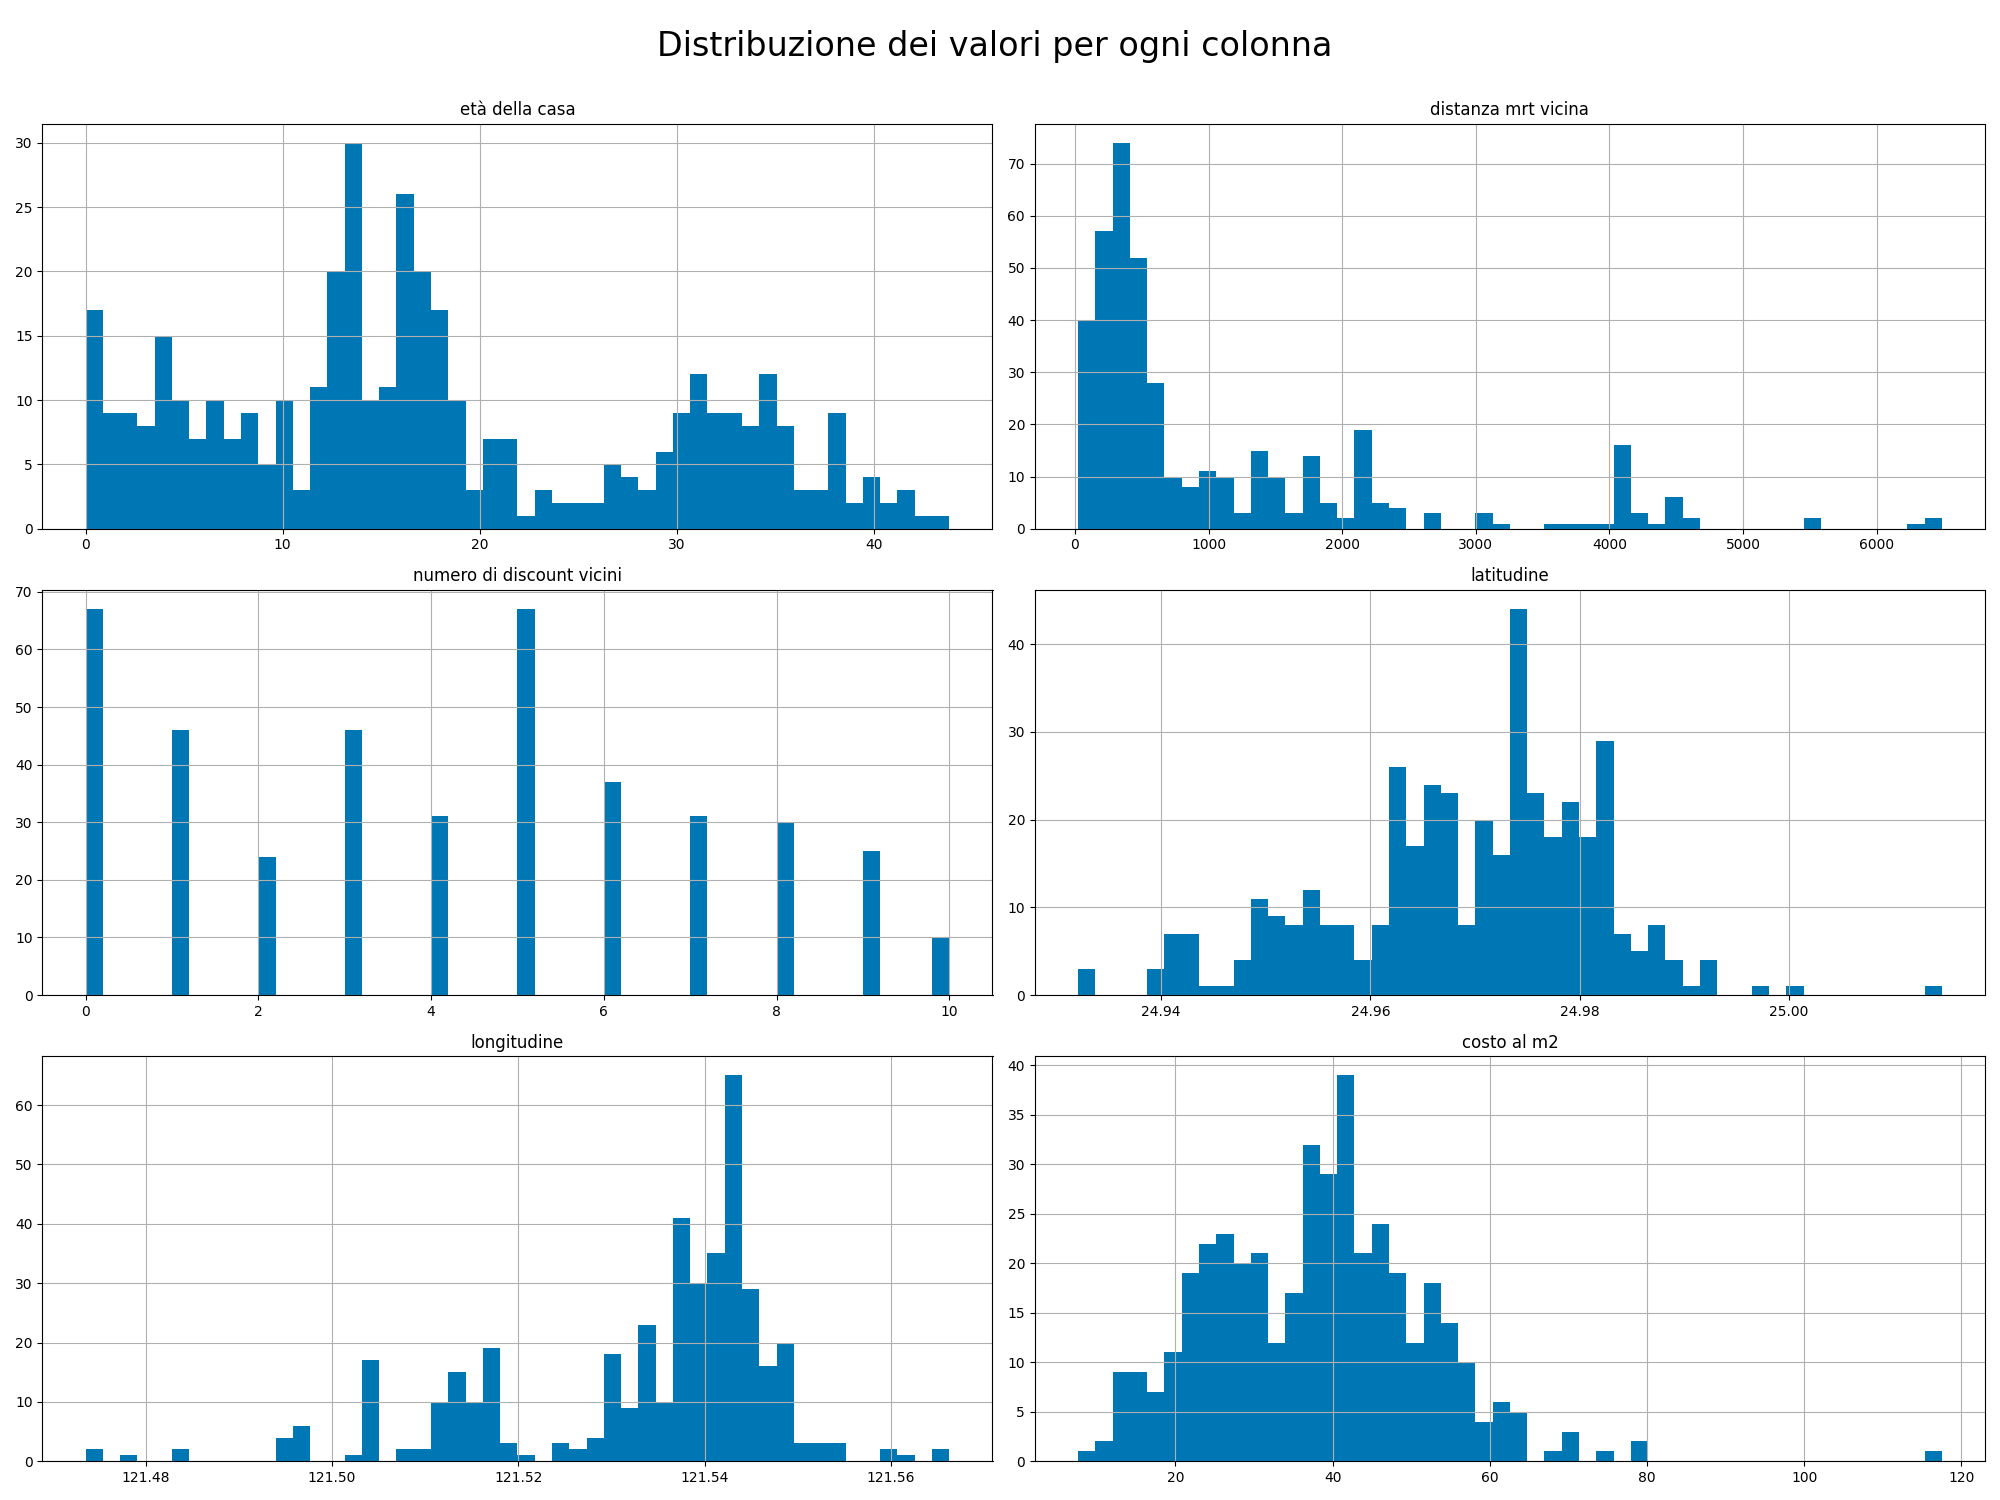

C:\Users\wolvi\AppData\Local\Temp\ipykernel_11360\3875973336.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Spectral", 256)


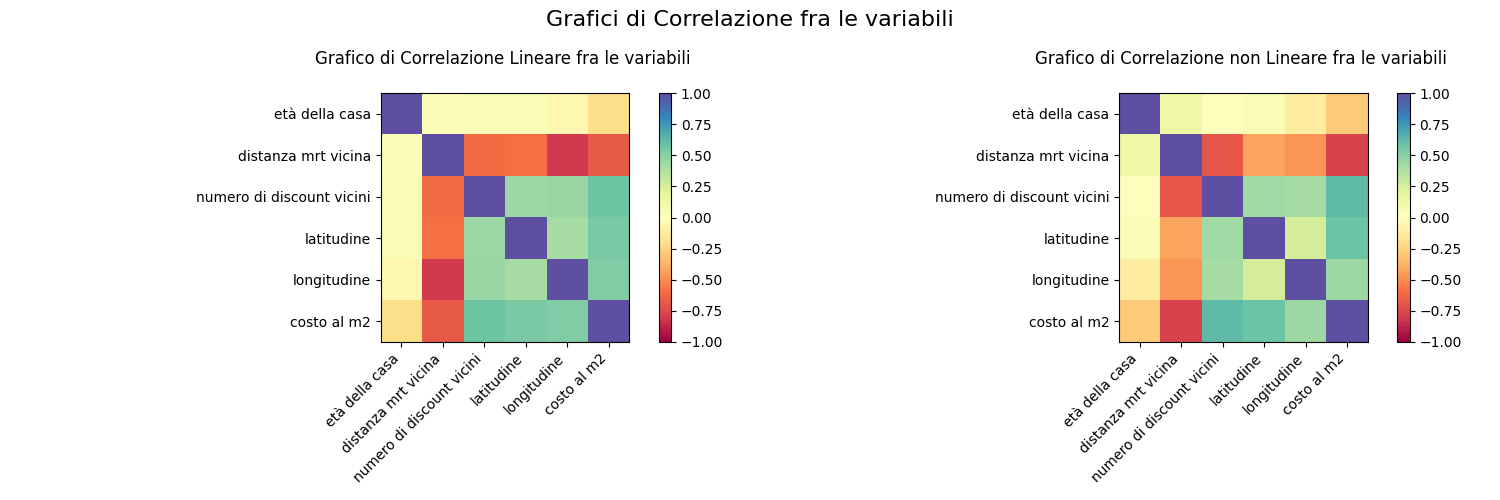

In [30]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Rimuovi  la prima colonna
df = df.iloc[:,1:]
# Trasforma i titoli delle colonne in minuscolo
df.columns = map(str.lower, df.columns)

# Correzione dei tipi di dati
# df["colonna_specifica"] = df["colonna_specifica"].astype(int)

# visualizzare la distribuzione dei valori per ogni colonna
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribuzione dei valori per ogni colonna \n", fontsize=24)
plt.tight_layout()
plt.show()

# Calcola la correlazione lineare tra le colonne
corr_matrix = df.corr(numeric_only=True)

# Crea una figura con due sottografici
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Crea una heatmap della matrice di correlazione lineare
cmap = plt.cm.get_cmap("Spectral", 256)
im1 = ax1.imshow(corr_matrix, cmap=cmap,clim=(-1, 1))
ax1.set_xticks(np.arange(corr_matrix.shape[1]))
ax1.set_yticks(np.arange(corr_matrix.shape[0]))
ax1.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax1.set_yticklabels(corr_matrix.index)
ax1.set_title("Grafico di Correlazione Lineare fra le variabili \n")
plt.colorbar(im1, ax=ax1)

# Calcola la correlazione non lineare tra le colonne
corr_matrix_non_lineare = df.corr(method="spearman", numeric_only=True)

# Crea una heatmap della matrice di correlazione non lineare
im2 = ax2.imshow(corr_matrix_non_lineare, cmap=cmap,clim=(-1, 1))
ax2.set_xticks(np.arange(corr_matrix_non_lineare.shape[1]))
ax2.set_yticks(np.arange(corr_matrix_non_lineare.shape[0]))
ax2.set_xticklabels(corr_matrix_non_lineare.columns, rotation=45, ha="right")
ax2.set_yticklabels(corr_matrix_non_lineare.index)
ax2.set_title("Grafico di Correlazione non Lineare fra le variabili \n")
plt.colorbar(im2, ax=ax2)

plt.suptitle("Grafici di Correlazione fra le variabili", fontsize=16)
plt.tight_layout()
plt.show()

## Identifica pattern, tendenze o anomalie nei dati


## Esegui analisi delle correlazioni tra le variabili


## Utilizza tecniche di visualizzazione dei dati per presentare informazioni chiave

---
# Preparazione dei dati per il modello
## Effettua la divisione dei dati in set di addestramento e set di test

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Prepara i dati
X = df.drop('costo al m2', axis=1)  
y = df[['costo al m2']]
y.head()

,costo al m2
No,
1,37.9
2,42.2
3,47.3
4,54.8
5,43.1


## Applica tecniche di selezione delle caratteristiche o riduzione della dimensionalità, se necessario

In [37]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


# Separazione delle feature X e della variabile target y
X = df.drop('costo al m2', axis=1)
y = df['costo al m2']



# Importanza delle feature con Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
selected_features_rf = feature_importance_df.sort_values(by='Importance', ascending=False)['Feature']

# Ricorsiva delle feature con RFECV
estimator = RandomForestRegressor()
rfecv = RFECV(estimator, cv=5)
X_rfecv = rfecv.fit_transform(X, y)
selected_features_rfecv = X.columns[rfecv.support_]

# Selezione delle feature con Lasso (L1 regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
selected_features_lasso = X.columns[lasso.coef_ != 0]

# Selezione delle feature con stabilità delle feature
rf = RandomForestRegressor()  # Inizializza il regressore Random Forest
sfm = SelectFromModel(estimator=rf)
X_sfm = sfm.fit_transform(X, y)
selected_features_sfm = X.columns[sfm.get_support()]

# Stampa le caratteristiche selezionate per ciascun metodo
print("\nCaratteristiche selezionate con Random Forest:")
print(selected_features_rf)
print("\nCaratteristiche selezionate con Ricorsiva delle feature (RFECV):")
print(selected_features_rfecv)
print("\nCaratteristiche selezionate con Lasso (L1 regularization):")
print(selected_features_lasso)
print("\nCaratteristiche selezionate con Stabilità delle feature:")
print(selected_features_sfm)

# Caratteristiche che non sono state selezionate da altri metodi
not_selected_features = X.columns[~X.columns.isin(selected_features_rf)
                                  & ~X.columns.isin(selected_features_rfecv)
                                  & ~X.columns.isin(selected_features_lasso)
                                  & ~X.columns.isin(selected_features_sfm)]

print("\nCaratteristiche non selezionate:")
print(not_selected_features)




Caratteristiche selezionate con Random Forest:
1          distanza mrt vicina
0               età della casa
3                   latitudine
4                  longitudine
2    numero di discount vicini
Name: Feature, dtype: object

Caratteristiche selezionate con Ricorsiva delle feature (RFECV):
Index(['età della casa', 'distanza mrt vicina', 'numero di discount vicini', 'latitudine', 'longitudine'], dtype='object')

Caratteristiche selezionate con Lasso (L1 regularization):
Index(['età della casa', 'distanza mrt vicina', 'numero di discount vicini'], dtype='object')

Caratteristiche selezionate con Stabilità delle feature:
Index(['età della casa', 'distanza mrt vicina'], dtype='object')

Caratteristiche non selezionate:
Index([], dtype='object')


In [23]:
import pandas as pd
import scipy.stats as stats

def generate_dataset_report(df):
    report = pd.DataFrame(columns=['Features', 'Distribuzione', 'Modalità', 'Normalità', 'Tipo', 'Media', 'Varianza', 'Numero di valori unici', 'Bilanciamento', 'Bias'])

    for column in df.columns:
        column_info = {}
        column_info['Features'] = column
        column_info['Distribuzione'] = ""
        column_info['Modalità'] = ""
        column_info['Normalità'] = ""
        column_info['Tipo'] = ""
        column_info['Media'] = ""
        column_info['Varianza'] = ""
        column_info['N° valori unici'] = ""
        column_info['Bilanciamento'] = ""
        column_info['Bias'] = ""
        if pd.api.types.is_integer_dtype(df[column]):
            column_info['Tipo'] = 'discreta'
            column_info['Distribuzione'] = ""
            column_info['Modalità'] = ""
            column_info['Normalità'] = ""
            column_info['Media'] = ""
            column_info['Varianza'] = ""
            column_info['N° valori unici'] = df[column].nunique()
            column_info['Bilanciamento'] = "bilanciate" if df[column].nunique() <= 2 or df[column].value_counts(normalize=True).max() >= 0.8 else "sbilanciate"
            column_info['Bias'] = "con bias" if df[column].value_counts(normalize=True).max() >= 0.8 else "senza bias"
        elif pd.api.types.is_numeric_dtype(df[column]):
            column_info['Tipo'] = 'continua'
            column_info['Distribuzione'] = "simmetrica" if stats.skew(df[column]) < 0.5 else "asimmetrica"
            column_info['Modalità'] = "unimodale" if stats.kurtosis(df[column]) < 3 else "bimodale o multimodale"
            column_info['Normalità'] = "normale" if stats.normaltest(df[column]).pvalue > 0.05 else "non normale"
            column_info['Media'] = df[column].mean()
            column_info['Varianza'] = df[column].var()
            column_info['N° valori unici'] = ""
            column_info['Bilanciamento'] = ""
            column_info['Bias'] = ""
        elif pd.api.types.is_categorical_dtype(df[column]):
            column_info['Tipo'] = 'categorica'
            column_info['Distribuzione'] = ""
            column_info['Modalità'] = ""
            column_info['Normalità'] = ""
            column_info['Media'] = ""
            column_info['Varianza'] = ""
            column_info['N° valori unici'] = df[column].nunique()
            column_info['Bilanciamento'] = "bilanciate" if df[column].nunique() <= 2 or df[column].value_counts(normalize=True).max() >= 0.8 else "sbilanciate"
            column_info['Bias'] = "con bias" if df[column].value_counts(normalize=True).max() >= 0.8 else "senza bias"


        report = pd.concat([report, pd.DataFrame([column_info])], ignore_index=True)

    return report


report = generate_dataset_report(df)
print(report)

                    Features Distribuzione                Modalità    Normalità      Tipo        Media        Varianza Numero di valori unici Bilanciamento        Bias N° valori unici
0             età della casa    simmetrica               unimodale  non normale  continua     17.71256      129.788704                    NaN                                          
1        distanza mrt vicina   asimmetrica  bimodale o multimodale  non normale  continua  1083.885689  1592920.630821                    NaN                                          
2  numero di discount vicini                                                     discreta                                                 NaN   sbilanciate  senza bias              11
3                 latitudine    simmetrica               unimodale  non normale  continua     24.96903        0.000154                    NaN                                          
4                longitudine    simmetrica               unimodale  non normale 

## Gestisci eventuali sbilanciamenti di classe nei dati, ad esempio tramite campionamento o pesatura

In [ ]:
# Creazione del dataframe per la tabella
table_data = {}
for method, selected_features in zip(['Feature Importance', 'Univariate Feature Selection', 'RFE'],
                                     [feature_importance_df['Feature'], selected_features_chi2, selected_features_rfe]):
# Creazione del dataframe per la tabella
all_features = set(feature_importance_df['Feature']) | set(selected_features_chi2) | set(selected_features_rfe)
table_data = {}
for feature in all_features:
    table_data[feature] = [
        selected_features_feature_importance.tolist().count(feature) * 'Feature Importance',
        selected_features_chi2.tolist().count(feature) * 'Univariate Feature Selection',
        selected_features_rfe.tolist().count(feature) * 'RFE'
    ]

# Creazione del dataframe con caratteristiche separate
table_df = pd.DataFrame(table_data)

# Riempimento dei valori mancanti con NaN
table_df.fillna('', inplace=True)

# Stampa della tabella
print(table_df)

---
# Creazione e addestramento del modello
## Scegli l'algoritmo di machine learning o di data science appropriato per il tuo problema


## Configura gli iperparametri del modello


## Addestra il modello utilizzando il set di addestramento


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert target variables to numeric format
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Dividi il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisci il processo di selezione delle features e il modello di regressione all'interno di una pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=chi2, k='all')),
    ('regression', None)  # Utilizzeremo questa placeholder per specificare il modello durante la ricerca degli iperparametri
])

# Definisci i possibili valori degli iperparametri da testare
parameters = [
    {
        'regression': [Lasso()],
        'regression__alpha': [0.1, 1, 10]
    },
    {
        'regression': [RandomForestRegressor()],
        'regression__n_estimators': [100, 200, 300]
    },
    {
        'regression': [SVR()],
        'regression__C': [0.1, 1, 10],
        'regression__kernel': ['linear', 'rbf']
    },
    {
        'regression': [GradientBoostingRegressor()],
        'regression__n_estimators': [100, 200, 300],
        'regression__learning_rate': [0.1, 0.01]
    }
]

# Crea un oggetto GridSearchCV per eseguire la ricerca degli iperparametri
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')  # Utilizza la cross-validation con 5 fold
grid_search.fit(X_train, y_train)

# Stampa i risultati della ricerca degli iperparametri
print("Migliori parametri:", grid_search.best_params_)
print("Miglior score:", -grid_search.best_score_)

# Accedi al modello e alle feature selezionate migliori
best_model = grid_search.best_estimator_
best_features = X.columns[best_model.named_steps['feature_selection'].get_support()]


## Valuta le prestazioni del modello utilizzando metriche appropriate

---
# Ottimizzazione del modello
## Esegui l'ottimizzazione degli iperparametri del modello(ricerca a griglia, ricerca casuale, ricerca bayesiana)

## Valuta le prestazioni del modello ottimizzato utilizzando metriche aggiuntive o convalida incrociata

## Effettua eventuali modifiche o regolazioni al modello per migliorarne le prestazioni

---
# Valutazione del modello
## Valuta il modello utilizzando il set di test o altre metriche di valutazione appropriate

## Analizza e interpreta i risultati del modello

## Identifica i punti di forza e di debolezza del modello e considera eventuali miglioramenti

---
# Presentazione dei risultati
## Crea visualizzazioni chiare e informative per presentare i risultati e le conclusioni

## Documenta il processo, le decisioni prese e le sfide affrontate durante il progetto

## Spiega i passaggi chiave e le scelte effettuate all'interno del notebook utilizzando commenti, markdown e annotazioni

## Fornisci una conclusione sintetica e un riepilogo dei risultati ottenuti